In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from statsmodels.stats.proportion import proportion_confint
from tqdm import tqdm

In [5]:
matplotlib.rcParams.update({'font.size': 14})

In [6]:
inpath = "/scratch/PI/horence/JuliaO/bowtie2/output/"
outpath = "/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/notebooks/output/parse_bowtie2_output/"

In [7]:
def process_channel(channel_df,dataname):
  # drop duplicates by cell + transcript + UMI
  channel_df["UMI_transcript_barcode"] = channel_df["UMI"] + "_" + channel_df["transcript"] + "_" + channel_df["barcode"]
  print(channel_df.shape)
  channel_df = channel_df.drop_duplicates("UMI_transcript_barcode")
  print(channel_df.shape)
  
  # get counts for each cell
  channel_df["barcode_transcript"] = channel_df["barcode"] + "_" + channel_df["transcript"] 
  channel_df["numReads"] = channel_df["barcode_transcript"].map(channel_df.groupby("barcode_transcript")["read"].nunique())
  channel_df = channel_df.drop_duplicates("barcode_transcript")[["transcript","barcode","numReads","barcode_transcript"]]
  channel_df["cell"] = dataname + "_" + channel_df["barcode"]
  return channel_df

In [8]:

data = {
  "lemur" : [[x.split("/")[-1][:-22] for x in glob("{}MLCA*extracted_R2_001.sam".format(inpath))],"/scratch/PI/horence/Roozbeh/single_cell_project/output/Lemur_Antoine_10X/meta.tsv"],
  "human" : [[x.split("/")[-1][:-22] for x in glob("{}TSP2*extracted_R2_001.sam".format(inpath))],"/scratch/PI/horence/Roozbeh/single_cell_project/output/TSP2_10X_rerun/meta.tsv"],
  "mouse" : [[x.split("/")[-1][:-22] for x in glob("{}10X_P1_*extracted_R2_001.sam".format(inpath))],"/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/notebooks/output/parse_bowtie2_output/tabula_muris_senis_meta.tsv"]
}
# data = { 
#   "lemur" : [["MLCA_ANTOINE_RETINA_S6_L00"],"/scratch/PI/horence/Roozbeh/single_cell_project/output/Lemur_Antoine_10X/meta.tsv"]
  
# }
species_dict = {}
for species, data_info in data.items():
  meta = pd.read_csv(data_info[1],sep="\t")
  if "cell1" in meta.columns:
    meta["cell"] = meta["cell1"]
  all_dfs = []
  for dataname in tqdm(data_info[0]):
    lane_sams = glob("{}{}*_extracted_R2_001.sam".format(inpath,dataname))
    dfs = []
    for sam in lane_sams:
      df = pd.read_csv(sam,sep="\t",skiprows=10,header=None,usecols=[0,2],names=["read","transcript"])
      df["barcode"] = df["read"].str.split("_").str[1]
      df["UMI"] = df["read"].str.split("_").str[2]
      dfs.append(df)
    channel_df = pd.concat(dfs,axis=0)
    all_dfs.append(process_channel(channel_df,dataname))
  all_df = pd.concat(all_dfs,axis=0)

  # map compartments
  all_df["compartment"] = all_df["cell"].map(pd.Series(meta.compartment.values,index=meta.cell).to_dict())
  all_df = all_df[~all_df["compartment"].isna()]
  species_dict[species] = all_df

/home/users/jolivier/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  0%|          | 0/46 [00:00<?, ?it/s]/home/users/jolivier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/users/jolivier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

(25808, 5)
(17737, 5)


  4%|▍         | 2/46 [00:02<00:51,  1.18s/it]

(32415, 5)
(19532, 5)


  7%|▋         | 3/46 [00:03<00:53,  1.24s/it]

(6623, 5)
(5857, 5)


  9%|▊         | 4/46 [00:05<00:51,  1.24s/it]

(69744, 5)
(9762, 5)


 11%|█         | 5/46 [00:05<00:38,  1.06it/s]

(25808, 5)
(17737, 5)


 13%|█▎        | 6/46 [00:06<00:36,  1.09it/s]

(11082, 5)
(7885, 5)


 15%|█▌        | 7/46 [00:07<00:35,  1.08it/s]

(23708, 5)
(20018, 5)


 17%|█▋        | 8/46 [00:08<00:39,  1.04s/it]

(40273, 5)
(13567, 5)


 20%|█▉        | 9/46 [00:10<00:44,  1.19s/it]

(63782, 5)
(40209, 5)


 22%|██▏       | 10/46 [00:10<00:39,  1.09s/it]

(47512, 5)
(24742, 5)


 24%|██▍       | 11/46 [00:11<00:36,  1.04s/it]

(31033, 5)
(23393, 5)


 26%|██▌       | 12/46 [00:12<00:32,  1.05it/s]

(1977, 5)
(1153, 5)


 28%|██▊       | 13/46 [00:12<00:25,  1.28it/s]

(11082, 5)
(7885, 5)


 30%|███       | 14/46 [00:13<00:26,  1.21it/s]

(44871, 5)
(26794, 5)


 33%|███▎      | 15/46 [00:14<00:23,  1.30it/s]

(47512, 5)
(24742, 5)


 35%|███▍      | 16/46 [00:15<00:21,  1.40it/s]

(32415, 5)
(19532, 5)


 37%|███▋      | 17/46 [00:16<00:28,  1.03it/s]

(45196, 5)
(9921, 5)


 39%|███▉      | 18/46 [00:17<00:24,  1.15it/s]

(9450, 5)
(3822, 5)


 41%|████▏     | 19/46 [00:18<00:27,  1.03s/it]

(67373, 5)
(41832, 5)


 43%|████▎     | 20/46 [00:19<00:23,  1.09it/s]

(4577, 5)
(2867, 5)


 46%|████▌     | 21/46 [00:19<00:20,  1.24it/s]

(40273, 5)
(13567, 5)


 48%|████▊     | 22/46 [00:21<00:25,  1.08s/it]

(41606, 5)
(32712, 5)


 50%|█████     | 23/46 [00:21<00:18,  1.21it/s]

(4577, 5)
(2867, 5)


 52%|█████▏    | 24/46 [00:22<00:18,  1.22it/s]

(44871, 5)
(26794, 5)


 54%|█████▍    | 25/46 [00:23<00:18,  1.11it/s]

(67373, 5)
(41832, 5)


 57%|█████▋    | 26/46 [00:24<00:17,  1.17it/s]

(27995, 5)
(15709, 5)


 59%|█████▊    | 27/46 [00:25<00:17,  1.07it/s]

(36010, 5)
(25964, 5)
(71189, 5)
(59863, 5)


 63%|██████▎   | 29/46 [00:27<00:16,  1.05it/s]

(27995, 5)
(15709, 5)


 65%|██████▌   | 30/46 [00:28<00:15,  1.06it/s]

(38015, 5)
(10674, 5)


 67%|██████▋   | 31/46 [00:29<00:13,  1.14it/s]

(69744, 5)
(9762, 5)


 70%|██████▉   | 32/46 [00:30<00:14,  1.01s/it]

(55720, 5)
(36375, 5)


 72%|███████▏  | 33/46 [00:31<00:13,  1.06s/it]

(25174, 5)
(11705, 5)


 74%|███████▍  | 34/46 [00:32<00:12,  1.03s/it]

(71189, 5)
(59863, 5)


 76%|███████▌  | 35/46 [00:33<00:10,  1.09it/s]

(41606, 5)
(32712, 5)


 78%|███████▊  | 36/46 [00:34<00:07,  1.29it/s]

(38015, 5)
(10674, 5)


 80%|████████  | 37/46 [00:34<00:05,  1.62it/s]

(9450, 5)
(3822, 5)


 83%|████████▎ | 38/46 [00:34<00:04,  1.72it/s]

(6623, 5)
(5857, 5)
(1977, 5)
(1153, 5)


 87%|████████▋ | 40/46 [00:35<00:02,  2.00it/s]

(36010, 5)
(25964, 5)


 89%|████████▉ | 41/46 [00:35<00:02,  1.96it/s]

(31033, 5)
(23393, 5)


 91%|█████████▏| 42/46 [00:36<00:02,  1.63it/s]

(55720, 5)
(36375, 5)


 93%|█████████▎| 43/46 [00:37<00:01,  1.75it/s]

(23708, 5)
(20018, 5)


 96%|█████████▌| 44/46 [00:38<00:01,  1.57it/s]

(45196, 5)
(9921, 5)


 98%|█████████▊| 45/46 [00:39<00:00,  1.37it/s]

(63782, 5)
(40209, 5)


100%|██████████| 46/46 [00:39<00:00,  1.17it/s]

(25174, 5)
(11705, 5)



  1%|          | 1/140 [00:01<03:17,  1.42s/it]

(50573, 5)
(31827, 5)


  1%|▏         | 2/140 [00:02<03:08,  1.37s/it]

(16352, 5)
(12453, 5)


  2%|▏         | 3/140 [00:04<03:29,  1.53s/it]

(47701, 5)
(28446, 5)


  3%|▎         | 4/140 [00:06<03:24,  1.50s/it]

(28572, 5)
(12682, 5)


  4%|▎         | 5/140 [00:07<03:11,  1.42s/it]

(47701, 5)
(28446, 5)


  4%|▍         | 6/140 [00:07<02:43,  1.22s/it]

(4990, 5)
(4177, 5)


  5%|▌         | 7/140 [00:08<02:05,  1.06it/s]

(304, 5)
(259, 5)


  6%|▌         | 8/140 [00:08<01:41,  1.29it/s]

(631, 5)
(439, 5)


  6%|▋         | 9/140 [00:08<01:19,  1.64it/s]

(80, 5)
(65, 5)


  7%|▋         | 10/140 [00:11<02:26,  1.13s/it]

(31052, 5)
(20634, 5)


  8%|▊         | 11/140 [00:11<02:01,  1.06it/s]

(50573, 5)
(31827, 5)


  9%|▊         | 12/140 [00:12<01:39,  1.29it/s]

(16352, 5)
(12453, 5)


  9%|▉         | 13/140 [00:14<02:31,  1.19s/it]

(78027, 5)
(48344, 5)


 10%|█         | 14/140 [00:14<01:55,  1.09it/s]

(304, 5)
(259, 5)


 11%|█         | 15/140 [00:16<02:23,  1.15s/it]

(28421, 5)
(18886, 5)


 11%|█▏        | 16/140 [00:18<02:49,  1.37s/it]

(50053, 5)
(37784, 5)


 12%|█▏        | 17/140 [00:19<02:55,  1.43s/it]

(17693, 5)
(13785, 5)


 13%|█▎        | 18/140 [00:20<02:36,  1.28s/it]

(31052, 5)
(20634, 5)


 14%|█▎        | 19/140 [00:21<02:30,  1.24s/it]

(19379, 5)
(15112, 5)


 14%|█▍        | 20/140 [00:23<02:54,  1.45s/it]

(81078, 5)
(44395, 5)


 15%|█▌        | 21/140 [00:23<02:06,  1.06s/it]

(304, 5)
(259, 5)


 16%|█▌        | 22/140 [00:25<02:39,  1.35s/it]

(44564, 5)
(26508, 5)


 16%|█▋        | 23/140 [00:26<02:21,  1.21s/it]

(28421, 5)
(18886, 5)


 17%|█▋        | 24/140 [00:28<02:24,  1.25s/it]

(78027, 5)
(48344, 5)


 18%|█▊        | 25/140 [00:30<02:54,  1.52s/it]

(54233, 5)
(40470, 5)


 19%|█▊        | 26/140 [00:30<02:17,  1.21s/it]

(485, 5)
(348, 5)


 19%|█▉        | 27/140 [00:31<02:01,  1.08s/it]

(19379, 5)
(15112, 5)


 20%|██        | 28/140 [00:33<02:24,  1.29s/it]

(48284, 5)
(35537, 5)


 21%|██        | 29/140 [00:34<02:03,  1.11s/it]

(47701, 5)
(28446, 5)


 21%|██▏       | 30/140 [00:35<02:23,  1.31s/it]

(22318, 5)
(17173, 5)


 22%|██▏       | 31/140 [00:36<01:59,  1.10s/it]

(31052, 5)
(20634, 5)


 23%|██▎       | 32/140 [00:38<02:41,  1.49s/it]

(70419, 5)
(53244, 5)


 24%|██▎       | 33/140 [00:39<02:25,  1.36s/it]

(50573, 5)
(31827, 5)


 24%|██▍       | 34/140 [00:41<02:45,  1.56s/it]

(82821, 5)
(56076, 5)


 25%|██▌       | 35/140 [00:42<02:19,  1.33s/it]

(50053, 5)
(37784, 5)


 26%|██▌       | 36/140 [00:43<01:54,  1.10s/it]

(47701, 5)
(28446, 5)


 26%|██▋       | 37/140 [00:44<01:47,  1.04s/it]

(70419, 5)
(53244, 5)


 27%|██▋       | 38/140 [00:44<01:18,  1.30it/s]

(485, 5)
(348, 5)


 28%|██▊       | 39/140 [00:44<01:01,  1.65it/s]

(80, 5)
(65, 5)


 29%|██▊       | 40/140 [00:45<01:14,  1.35it/s]

(16563, 5)
(10297, 5)


 29%|██▉       | 41/140 [00:46<01:24,  1.17it/s]

(28572, 5)
(12682, 5)


 30%|███       | 42/140 [00:48<02:03,  1.26s/it]

(69571, 5)
(52242, 5)


 31%|███       | 43/140 [00:49<01:52,  1.16s/it]

(82821, 5)
(56076, 5)


 31%|███▏      | 44/140 [00:50<01:26,  1.11it/s]

(631, 5)
(439, 5)


 32%|███▏      | 45/140 [00:50<01:13,  1.30it/s]

(17693, 5)
(13785, 5)


 33%|███▎      | 46/140 [00:52<01:31,  1.03it/s]

(82821, 5)
(56076, 5)


 34%|███▎      | 47/140 [00:53<01:30,  1.02it/s]

(12429, 5)
(6837, 5)


 34%|███▍      | 48/140 [00:53<01:14,  1.24it/s]

(12429, 5)
(6837, 5)


 35%|███▌      | 49/140 [00:53<00:57,  1.59it/s]

(442, 5)
(353, 5)


 36%|███▌      | 50/140 [00:54<00:53,  1.67it/s]

(22318, 5)
(17173, 5)


 36%|███▋      | 51/140 [00:55<01:14,  1.19it/s]

(55635, 5)
(44637, 5)


 37%|███▋      | 52/140 [00:57<01:52,  1.28s/it]

(67575, 5)
(41542, 5)


 38%|███▊      | 53/140 [00:58<01:27,  1.00s/it]

(28421, 5)
(18886, 5)


 39%|███▊      | 54/140 [01:00<01:49,  1.27s/it]

(37461, 5)
(27327, 5)
(442, 5)
(353, 5)


 40%|████      | 56/140 [01:00<01:22,  1.02it/s]

(50053, 5)
(37784, 5)


 41%|████      | 57/140 [01:01<01:04,  1.28it/s]

(17693, 5)
(13785, 5)


 41%|████▏     | 58/140 [01:01<01:04,  1.28it/s]

(78027, 5)
(48344, 5)


 42%|████▏     | 59/140 [01:03<01:15,  1.08it/s]

(81078, 5)
(44395, 5)


 43%|████▎     | 60/140 [01:03<01:08,  1.16it/s]

(48284, 5)
(35537, 5)


 44%|████▎     | 61/140 [01:04<00:55,  1.42it/s]

(4990, 5)
(4177, 5)


 44%|████▍     | 62/140 [01:06<01:25,  1.09s/it]

(67404, 5)
(50954, 5)


 45%|████▌     | 63/140 [01:06<01:14,  1.03it/s]

(54233, 5)
(40470, 5)


 46%|████▋     | 65/140 [01:07<00:51,  1.45it/s]

(631, 5)
(439, 5)
(304, 5)
(259, 5)


 47%|████▋     | 66/140 [01:08<00:41,  1.80it/s]

(4990, 5)
(4177, 5)


 48%|████▊     | 67/140 [01:08<00:48,  1.50it/s]

(3625, 5)
(2785, 5)


 49%|████▊     | 68/140 [01:10<01:16,  1.07s/it]

(51503, 5)
(33470, 5)


 49%|████▉     | 69/140 [01:11<01:01,  1.15it/s]

(22318, 5)
(17173, 5)


 50%|█████     | 70/140 [01:12<01:02,  1.13it/s]

(23164, 5)
(15599, 5)


 51%|█████     | 71/140 [01:13<01:01,  1.13it/s]

(81078, 5)
(44395, 5)


 51%|█████▏    | 72/140 [01:13<00:55,  1.23it/s]

(51503, 5)
(33470, 5)


 53%|█████▎    | 74/140 [01:14<00:34,  1.92it/s]

(19379, 5)
(15112, 5)
(442, 5)
(353, 5)


 54%|█████▎    | 75/140 [01:15<00:47,  1.36it/s]

(51503, 5)
(33470, 5)


 54%|█████▍    | 76/140 [01:15<00:37,  1.70it/s]

(23164, 5)
(15599, 5)


 55%|█████▌    | 77/140 [01:16<00:36,  1.72it/s]

(55635, 5)
(44637, 5)


 56%|█████▌    | 78/140 [01:17<00:37,  1.65it/s]

(37461, 5)
(27327, 5)


 56%|█████▋    | 79/140 [01:17<00:40,  1.52it/s]

(67575, 5)
(41542, 5)


 57%|█████▋    | 80/140 [01:18<00:33,  1.80it/s]

(16352, 5)
(12453, 5)


 58%|█████▊    | 81/140 [01:18<00:34,  1.72it/s]

(54233, 5)
(40470, 5)


 59%|█████▊    | 82/140 [01:19<00:36,  1.59it/s]

(70419, 5)
(53244, 5)


 59%|█████▉    | 83/140 [01:20<00:46,  1.24it/s]

(48284, 5)
(35537, 5)


 60%|██████    | 84/140 [01:21<00:41,  1.34it/s]

(50573, 5)
(31827, 5)


 61%|██████    | 85/140 [01:22<00:42,  1.30it/s]

(78027, 5)
(48344, 5)


 61%|██████▏   | 86/140 [01:22<00:35,  1.52it/s]

(23164, 5)
(15599, 5)


 62%|██████▏   | 87/140 [01:23<00:39,  1.35it/s]

(82821, 5)
(56076, 5)


 63%|██████▎   | 88/140 [01:23<00:31,  1.63it/s]

(3625, 5)
(2785, 5)


 64%|██████▎   | 89/140 [01:24<00:27,  1.86it/s]

(16563, 5)
(10297, 5)


 64%|██████▍   | 90/140 [01:24<00:22,  2.20it/s]

(16563, 5)
(10297, 5)


 65%|██████▌   | 91/140 [01:25<00:31,  1.57it/s]

(37461, 5)
(27327, 5)


 66%|██████▌   | 92/140 [01:27<00:47,  1.01it/s]

(19249, 5)
(14771, 5)


 66%|██████▋   | 93/140 [01:27<00:36,  1.27it/s]

(485, 5)
(348, 5)


 67%|██████▋   | 94/140 [01:28<00:37,  1.23it/s]

(81078, 5)
(44395, 5)


 68%|██████▊   | 95/140 [01:29<00:33,  1.35it/s]

(28421, 5)
(18886, 5)


 69%|██████▊   | 96/140 [01:29<00:28,  1.55it/s]

(16352, 5)
(12453, 5)


 69%|██████▉   | 97/140 [01:30<00:31,  1.37it/s]

(12429, 5)
(6837, 5)


 70%|███████   | 98/140 [01:31<00:30,  1.37it/s]

(37461, 5)
(27327, 5)


 71%|███████   | 99/140 [01:31<00:29,  1.39it/s]

(346, 5)
(263, 5)


 71%|███████▏  | 100/140 [01:32<00:28,  1.42it/s]

(50053, 5)
(37784, 5)


 72%|███████▏  | 101/140 [01:32<00:21,  1.84it/s]

(631, 5)
(439, 5)


 73%|███████▎  | 102/140 [01:33<00:24,  1.53it/s]

(70419, 5)
(53244, 5)


 74%|███████▎  | 103/140 [01:34<00:24,  1.49it/s]

(67404, 5)
(50954, 5)


 74%|███████▍  | 104/140 [01:34<00:19,  1.85it/s]

(4990, 5)
(4177, 5)


 75%|███████▌  | 105/140 [01:35<00:22,  1.52it/s]

(80, 5)
(65, 5)


 76%|███████▌  | 106/140 [01:36<00:29,  1.17it/s]

(67404, 5)
(50954, 5)


 76%|███████▋  | 107/140 [01:37<00:23,  1.38it/s]

(23164, 5)
(15599, 5)


 77%|███████▋  | 108/140 [01:37<00:21,  1.45it/s]

(19249, 5)
(14771, 5)


 78%|███████▊  | 109/140 [01:38<00:23,  1.34it/s]

(54233, 5)
(40470, 5)


 79%|███████▊  | 110/140 [01:39<00:19,  1.54it/s]

(28572, 5)
(12682, 5)


 79%|███████▉  | 111/140 [01:39<00:18,  1.58it/s]

(31052, 5)
(20634, 5)


 80%|████████  | 112/140 [01:40<00:22,  1.26it/s]

(19249, 5)
(14771, 5)


 81%|████████  | 113/140 [01:41<00:18,  1.43it/s]

(22318, 5)
(17173, 5)


 81%|████████▏ | 114/140 [01:41<00:16,  1.54it/s]

(55635, 5)
(44637, 5)


 82%|████████▏ | 115/140 [01:42<00:14,  1.72it/s]

(19249, 5)
(14771, 5)


 83%|████████▎ | 116/140 [01:43<00:16,  1.47it/s]

(69571, 5)
(52242, 5)


 84%|████████▎ | 117/140 [01:43<00:14,  1.62it/s]

(17693, 5)
(13785, 5)


 84%|████████▍ | 118/140 [01:44<00:12,  1.77it/s]

(16563, 5)
(10297, 5)


 85%|████████▌ | 119/140 [01:44<00:10,  1.92it/s]

(346, 5)
(263, 5)


 86%|████████▌ | 120/140 [01:46<00:16,  1.22it/s]

(69571, 5)
(52242, 5)


 86%|████████▋ | 121/140 [01:46<00:12,  1.51it/s]

(3625, 5)
(2785, 5)


 87%|████████▋ | 122/140 [01:47<00:12,  1.48it/s]

(67575, 5)
(41542, 5)


 88%|████████▊ | 123/140 [01:47<00:09,  1.84it/s]

(346, 5)
(263, 5)


 89%|████████▊ | 124/140 [01:47<00:08,  1.99it/s]

(44564, 5)
(26508, 5)


 89%|████████▉ | 125/140 [01:48<00:08,  1.77it/s]

(69571, 5)
(52242, 5)


 90%|█████████ | 126/140 [01:48<00:07,  1.81it/s]

(19379, 5)
(15112, 5)


 91%|█████████ | 127/140 [01:49<00:07,  1.74it/s]

(55635, 5)
(44637, 5)


 91%|█████████▏| 128/140 [01:50<00:07,  1.53it/s]

(346, 5)
(263, 5)


 92%|█████████▏| 129/140 [01:50<00:06,  1.77it/s]

(485, 5)
(348, 5)


 93%|█████████▎| 130/140 [01:51<00:06,  1.66it/s]

(67404, 5)
(50954, 5)


 94%|█████████▎| 131/140 [01:51<00:05,  1.74it/s]

(44564, 5)
(26508, 5)


 94%|█████████▍| 132/140 [01:52<00:03,  2.04it/s]

(442, 5)
(353, 5)


 95%|█████████▌| 133/140 [01:53<00:04,  1.66it/s]

(48284, 5)
(35537, 5)


 96%|█████████▌| 134/140 [01:54<00:04,  1.45it/s]

(67575, 5)
(41542, 5)


 96%|█████████▋| 135/140 [01:54<00:03,  1.44it/s]

(44564, 5)
(26508, 5)


 97%|█████████▋| 136/140 [01:55<00:02,  1.67it/s]

(28572, 5)
(12682, 5)


 98%|█████████▊| 137/140 [01:55<00:01,  2.01it/s]

(12429, 5)
(6837, 5)


 99%|█████████▊| 138/140 [01:55<00:01,  1.91it/s]

(51503, 5)
(33470, 5)


 99%|█████████▉| 139/140 [01:56<00:00,  1.73it/s]

(3625, 5)
(2785, 5)


100%|██████████| 140/140 [01:57<00:00,  1.19it/s]

(80, 5)
(65, 5)



/home/users/jolivier/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  3%|▎         | 1/32 [00:01<00:44,  1.44s/it]

(49298, 5)
(36454, 5)


  6%|▋         | 2/32 [00:03<00:47,  1.57s/it]

(107717, 5)
(61644, 5)
(107717, 5)
(61644, 5)


  9%|▉         | 3/32 [00:04<00:44,  1.54s/it]

(117825, 5)
(64058, 5)


 16%|█▌        | 5/32 [00:07<00:41,  1.53s/it]

(29955, 5)
(20634, 5)


 19%|█▉        | 6/32 [00:09<00:39,  1.52s/it]

(70880, 5)
(48740, 5)


 22%|██▏       | 7/32 [00:09<00:29,  1.16s/it]

(29955, 5)
(20634, 5)


 25%|██▌       | 8/32 [00:10<00:26,  1.11s/it]

(37656, 5)
(20777, 5)


 28%|██▊       | 9/32 [00:12<00:29,  1.29s/it]

(99662, 5)
(42333, 5)


 31%|███▏      | 10/32 [00:13<00:28,  1.32s/it]

(99662, 5)
(42333, 5)


 34%|███▍      | 11/32 [00:15<00:29,  1.40s/it]

(64365, 5)
(54585, 5)
(87477, 5)
(77123, 5)


 38%|███▊      | 12/32 [00:17<00:31,  1.57s/it]

(64365, 5)
(54585, 5)


 41%|████      | 13/32 [00:18<00:26,  1.38s/it]

(82335, 5)
(50630, 5)


 44%|████▍     | 14/32 [00:20<00:26,  1.46s/it]

(117825, 5)
(64058, 5)


 50%|█████     | 16/32 [00:22<00:22,  1.43s/it]

(68783, 5)
(7192, 5)
(87477, 5)
(77123, 5)


 56%|█████▋    | 18/32 [00:25<00:19,  1.38s/it]

(26358, 5)
(13325, 5)


 59%|█████▉    | 19/32 [00:26<00:16,  1.29s/it]

(37487, 5)
(5849, 5)


 62%|██████▎   | 20/32 [00:27<00:13,  1.10s/it]

(37487, 5)
(5849, 5)


 66%|██████▌   | 21/32 [00:28<00:11,  1.04s/it]

(68783, 5)
(7192, 5)


 69%|██████▉   | 22/32 [00:29<00:10,  1.07s/it]

(25326, 5)
(22332, 5)


 72%|███████▏  | 23/32 [00:29<00:08,  1.09it/s]

(25326, 5)
(22332, 5)


 75%|███████▌  | 24/32 [00:30<00:06,  1.21it/s]

(26358, 5)
(13325, 5)


 78%|███████▊  | 25/32 [00:31<00:06,  1.10it/s]

(44656, 5)
(7251, 5)


 81%|████████▏ | 26/32 [00:32<00:05,  1.14it/s]

(49298, 5)
(36454, 5)


 84%|████████▍ | 27/32 [00:34<00:05,  1.14s/it]

(79009, 5)
(46650, 5)


 88%|████████▊ | 28/32 [00:35<00:04,  1.07s/it]

(70880, 5)
(48740, 5)


 91%|█████████ | 29/32 [00:35<00:02,  1.08it/s]

(44656, 5)
(7251, 5)


 94%|█████████▍| 30/32 [00:36<00:01,  1.10it/s]

(79009, 5)
(46650, 5)


 97%|█████████▋| 31/32 [00:36<00:00,  1.33it/s]

(37656, 5)
(20777, 5)


100%|██████████| 32/32 [00:37<00:00,  1.18s/it]

(82335, 5)
(50630, 5)


In [9]:

# meta_file = "/scratch/PI/horence/Roozbeh/single_cell_project/output/Lemur_Antoine_10X/meta.tsv"
# meta = pd.read_csv(meta_file,sep="\t")

# datanames = ["MLCA_ANTOINE_LUNG_CD31_POS_S11_L00","MLCA_ANTOINE_LUNG_EPCAM_POS_S12_L00","MLCA_ANTOINE_LUNG_P3_S7_L00"]

# data = {
#   "lemur" : [["MLCA_ANTOINE_LUNG_CD31_POS_S11_L00","MLCA_ANTOINE_LUNG_EPCAM_POS_S12_L00","MLCA_ANTOINE_LUNG_P3_S7_L00"],
#                   "/scratch/PI/horence/Roozbeh/single_cell_project/output/Lemur_Antoine_10X/meta.tsv"], 
#         "human" : [["TSP2_Lung_proxmedialdistal_10X_1_1_S24_L00","TSP2_Lung_proxmedialdistal_10X_1_2_S25_L00"],
#                   "/scratch/PI/horence/Roozbeh/single_cell_project/output/TSP2_10X_rerun/meta.tsv"],
#        "mouse" : [["10X_P1_14_S14_L00"],
#                  "/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/notebooks/output/parse_bowtie2_output/tabula_muris_senis_meta.tsv"]}

# data = {
#   "lemur" : [["MLCA_ANTOINE_SMALLINTESTINE_COMBINED_S1_L00"],
#                   "/scratch/PI/horence/Roozbeh/single_cell_project/output/Lemur_Antoine_10X/meta.tsv"], 
#         "human" : [["TSP2_SI_distal_10X_1_1_Jejunum_S22_L00","TSP2_SI_proximal_10X_1_1_Duodenum_S21_L00",
#                    "TSP2_LI_distal_10X_1_1_Sigmoid_S9_L00","TSP2_LI_proximal_10X_1_1_Ascending_S8_L00"],
#                   "/scratch/PI/horence/Roozbeh/single_cell_project/output/TSP2_10X_rerun/meta.tsv"],
#        "mouse" : [["10X_P1_8_S8_L00"],
#                  "/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/notebooks/output/parse_bowtie2_output/tabula_muris_senis_meta.tsv"]}
data = {
  "lemur" : [[x.split("/")[-1][:-22] for x in glob("{}MLCA*extracted_R2_001.sam".format(inpath))],"/scratch/PI/horence/Roozbeh/single_cell_project/output/Lemur_Antoine_10X/meta.tsv"],
  "human" : [[x.split("/")[-1][:-22] for x in glob("{}TSP2*extracted_R2_001.sam".format(inpath))],"/scratch/PI/horence/Roozbeh/single_cell_project/output/TSP2_10X_rerun/meta.tsv"],
  "mouse" : [[x.split("/")[-1][:-22] for x in glob("{}10X_P1_*extracted_R2_001.sam".format(inpath))],"/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/notebooks/output/parse_bowtie2_output/tabula_muris_senis_meta.tsv"]
}
# data = { 
#   "lemur" : [["MLCA_ANTOINE_RETINA_S6_L00"],"/scratch/PI/horence/Roozbeh/single_cell_project/output/Lemur_Antoine_10X/meta.tsv"]
  
# }
species_dict = {}
for species, data_info in data.items():
  meta = pd.read_csv(data_info[1],sep="\t")
  if "cell1" in meta.columns:
    meta["cell"] = meta["cell1"]
  all_dfs = []
  for dataname in tqdm(data_info[0]):
    lane_sams = glob("{}{}*_extracted_R2_001.sam".format(inpath,dataname))
    dfs = []
    for sam in lane_sams:
      df = pd.read_csv(sam,sep="\t",skiprows=10,header=None,usecols=[0,2],names=["read","transcript"])
      df["barcode"] = df["read"].str.split("_").str[1]
      df["UMI"] = df["read"].str.split("_").str[2]
      dfs.append(df)
    channel_df = pd.concat(dfs,axis=0)
    all_dfs.append(process_channel(channel_df,dataname))
  all_df = pd.concat(all_dfs,axis=0)

  # map compartments
  all_df["compartment"] = all_df["cell"].map(pd.Series(meta.compartment.values,index=meta.cell).to_dict())
  all_df = all_df[~all_df["compartment"].isna()]
  species_dict[species] = all_df

  0%|          | 0/46 [00:00<?, ?it/s]/home/users/jolivier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/users/jolivier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
  2%|▏         | 1/46 [00:00<00:16,  2.65it/s]

(25808, 5)
(17737, 5)


  4%|▍         | 2/46 [00:00<00:18,  2.35it/s]

(32415, 5)
(19532, 5)


  7%|▋         | 3/46 [00:01<00:16,  2.66it/s]

(6623, 5)
(5857, 5)


  9%|▊         | 4/46 [00:01<00:17,  2.39it/s]

(69744, 5)
(9762, 5)


 11%|█         | 5/46 [00:02<00:15,  2.57it/s]

(25808, 5)
(17737, 5)


 13%|█▎        | 6/46 [00:02<00:14,  2.75it/s]

(11082, 5)
(7885, 5)


 15%|█▌        | 7/46 [00:02<00:14,  2.66it/s]

(23708, 5)
(20018, 5)


 17%|█▋        | 8/46 [00:03<00:15,  2.46it/s]

(40273, 5)
(13567, 5)


 20%|█▉        | 9/46 [00:03<00:17,  2.16it/s]

(63782, 5)
(40209, 5)


 22%|██▏       | 10/46 [00:04<00:18,  1.98it/s]

(47512, 5)
(24742, 5)


 24%|██▍       | 11/46 [00:04<00:15,  2.20it/s]

(31033, 5)
(23393, 5)
(1977, 5)
(1153, 5)


 28%|██▊       | 13/46 [00:05<00:11,  2.76it/s]

(11082, 5)
(7885, 5)


 30%|███       | 14/46 [00:05<00:14,  2.17it/s]

(44871, 5)
(26794, 5)


 33%|███▎      | 15/46 [00:06<00:17,  1.76it/s]

(47512, 5)
(24742, 5)


 35%|███▍      | 16/46 [00:07<00:15,  1.93it/s]

(32415, 5)
(19532, 5)


 37%|███▋      | 17/46 [00:07<00:16,  1.79it/s]

(45196, 5)
(9921, 5)


 39%|███▉      | 18/46 [00:08<00:13,  2.06it/s]

(9450, 5)
(3822, 5)


 41%|████▏     | 19/46 [00:08<00:15,  1.76it/s]

(67373, 5)
(41832, 5)
(4577, 5)
(2867, 5)


 46%|████▌     | 21/46 [00:09<00:12,  2.00it/s]

(40273, 5)
(13567, 5)


 48%|████▊     | 22/46 [00:10<00:12,  1.93it/s]

(41606, 5)
(32712, 5)


 50%|█████     | 23/46 [00:10<00:10,  2.29it/s]

(4577, 5)
(2867, 5)


 52%|█████▏    | 24/46 [00:10<00:10,  2.06it/s]

(44871, 5)
(26794, 5)


 54%|█████▍    | 25/46 [00:11<00:11,  1.80it/s]

(67373, 5)
(41832, 5)


 57%|█████▋    | 26/46 [00:12<00:10,  1.83it/s]

(27995, 5)
(15709, 5)


 59%|█████▊    | 27/46 [00:12<00:09,  1.94it/s]

(36010, 5)
(25964, 5)


 61%|██████    | 28/46 [00:13<00:10,  1.68it/s]

(71189, 5)
(59863, 5)


 63%|██████▎   | 29/46 [00:13<00:09,  1.87it/s]

(27995, 5)
(15709, 5)


 65%|██████▌   | 30/46 [00:14<00:07,  2.13it/s]

(38015, 5)
(10674, 5)


 67%|██████▋   | 31/46 [00:14<00:07,  1.91it/s]

(69744, 5)
(9762, 5)


 70%|██████▉   | 32/46 [00:15<00:07,  1.80it/s]

(55720, 5)
(36375, 5)


 72%|███████▏  | 33/46 [00:15<00:06,  1.90it/s]

(25174, 5)
(11705, 5)


 74%|███████▍  | 34/46 [00:16<00:07,  1.56it/s]

(71189, 5)
(59863, 5)


 76%|███████▌  | 35/46 [00:17<00:07,  1.44it/s]

(41606, 5)
(32712, 5)


 78%|███████▊  | 36/46 [00:18<00:06,  1.56it/s]

(38015, 5)
(10674, 5)
(9450, 5)
(3822, 5)
(6623, 5)
(5857, 5)


 85%|████████▍ | 39/46 [00:18<00:02,  2.43it/s]

(1977, 5)
(1153, 5)


 87%|████████▋ | 40/46 [00:19<00:03,  1.84it/s]

(36010, 5)
(25964, 5)


 89%|████████▉ | 41/46 [00:20<00:02,  1.73it/s]

(31033, 5)
(23393, 5)


 91%|█████████▏| 42/46 [00:20<00:02,  1.57it/s]

(55720, 5)
(36375, 5)


 93%|█████████▎| 43/46 [00:21<00:01,  1.81it/s]

(23708, 5)
(20018, 5)


 96%|█████████▌| 44/46 [00:21<00:01,  1.74it/s]

(45196, 5)
(9921, 5)


 98%|█████████▊| 45/46 [00:22<00:00,  1.61it/s]

(63782, 5)
(40209, 5)


100%|██████████| 46/46 [00:22<00:00,  2.01it/s]

(25174, 5)
(11705, 5)



  1%|          | 1/140 [00:00<01:45,  1.32it/s]

(50573, 5)
(31827, 5)


  1%|▏         | 2/140 [00:01<01:48,  1.27it/s]

(16352, 5)
(12453, 5)


  2%|▏         | 3/140 [00:02<01:51,  1.23it/s]

(47701, 5)
(28446, 5)


  3%|▎         | 4/140 [00:03<01:48,  1.25it/s]

(28572, 5)
(12682, 5)


  4%|▎         | 5/140 [00:04<01:50,  1.23it/s]

(47701, 5)
(28446, 5)


  4%|▍         | 6/140 [00:04<01:36,  1.39it/s]

(4990, 5)
(4177, 5)


  5%|▌         | 7/140 [00:04<01:15,  1.76it/s]

(304, 5)
(259, 5)


  6%|▌         | 8/140 [00:05<01:00,  2.17it/s]

(631, 5)
(439, 5)


  6%|▋         | 9/140 [00:05<00:50,  2.61it/s]

(80, 5)
(65, 5)


  7%|▋         | 10/140 [00:05<00:58,  2.23it/s]

(31052, 5)
(20634, 5)


  8%|▊         | 11/140 [00:06<01:06,  1.94it/s]

(50573, 5)
(31827, 5)


  9%|▊         | 12/140 [00:06<01:00,  2.11it/s]

(16352, 5)
(12453, 5)


  9%|▉         | 13/140 [00:07<01:15,  1.69it/s]

(78027, 5)
(48344, 5)


 10%|█         | 14/140 [00:07<00:59,  2.12it/s]

(304, 5)
(259, 5)


 11%|█         | 15/140 [00:08<00:55,  2.26it/s]

(28421, 5)
(18886, 5)


 11%|█▏        | 16/140 [00:08<00:59,  2.10it/s]

(50053, 5)
(37784, 5)


 12%|█▏        | 17/140 [00:09<00:54,  2.27it/s]

(17693, 5)
(13785, 5)


 13%|█▎        | 18/140 [00:09<00:53,  2.27it/s]

(31052, 5)
(20634, 5)


 14%|█▎        | 19/140 [00:09<00:48,  2.47it/s]

(19379, 5)
(15112, 5)


 14%|█▍        | 20/140 [00:11<01:18,  1.53it/s]

(81078, 5)
(44395, 5)


 15%|█▌        | 21/140 [00:11<01:01,  1.95it/s]

(304, 5)
(259, 5)


 16%|█▌        | 22/140 [00:12<01:04,  1.83it/s]

(44564, 5)
(26508, 5)


 16%|█▋        | 23/140 [00:13<01:21,  1.43it/s]

(28421, 5)
(18886, 5)


 17%|█▋        | 24/140 [00:14<01:33,  1.24it/s]

(78027, 5)
(48344, 5)


 18%|█▊        | 25/140 [00:15<01:42,  1.13it/s]

(54233, 5)
(40470, 5)


 19%|█▊        | 26/140 [00:15<01:31,  1.24it/s]

(485, 5)
(348, 5)


 19%|█▉        | 27/140 [00:16<01:35,  1.19it/s]

(19379, 5)
(15112, 5)


 20%|██        | 28/140 [00:17<01:44,  1.08it/s]

(48284, 5)
(35537, 5)


 21%|██        | 29/140 [00:18<01:47,  1.03it/s]

(47701, 5)
(28446, 5)


 21%|██▏       | 30/140 [00:19<01:29,  1.22it/s]

(22318, 5)
(17173, 5)


 22%|██▏       | 31/140 [00:19<01:19,  1.38it/s]

(31052, 5)
(20634, 5)


 23%|██▎       | 32/140 [00:21<01:32,  1.17it/s]

(70419, 5)
(53244, 5)


 24%|██▎       | 33/140 [00:22<01:42,  1.05it/s]

(50573, 5)
(31827, 5)


 24%|██▍       | 34/140 [00:23<01:52,  1.06s/it]

(82821, 5)
(56076, 5)


 25%|██▌       | 35/140 [00:25<02:04,  1.18s/it]

(50053, 5)
(37784, 5)


 26%|██▌       | 36/140 [00:26<01:58,  1.14s/it]

(47701, 5)
(28446, 5)


 26%|██▋       | 37/140 [00:27<01:59,  1.16s/it]

(70419, 5)
(53244, 5)


 27%|██▋       | 38/140 [00:28<01:48,  1.06s/it]

(485, 5)
(348, 5)


 28%|██▊       | 39/140 [00:28<01:32,  1.09it/s]

(80, 5)
(65, 5)


 29%|██▊       | 40/140 [00:29<01:30,  1.11it/s]

(16563, 5)
(10297, 5)


 29%|██▉       | 41/140 [00:30<01:27,  1.14it/s]

(28572, 5)
(12682, 5)


 30%|███       | 42/140 [00:31<01:33,  1.05it/s]

(69571, 5)
(52242, 5)


 31%|███       | 43/140 [00:32<01:33,  1.04it/s]

(82821, 5)
(56076, 5)


 31%|███▏      | 44/140 [00:32<01:13,  1.30it/s]

(631, 5)
(439, 5)


 32%|███▏      | 45/140 [00:33<01:06,  1.43it/s]

(17693, 5)
(13785, 5)


 33%|███▎      | 46/140 [00:34<01:13,  1.28it/s]

(82821, 5)
(56076, 5)


 34%|███▎      | 47/140 [00:34<01:00,  1.54it/s]

(12429, 5)
(6837, 5)


 35%|███▌      | 49/140 [00:35<00:39,  2.31it/s]

(12429, 5)
(6837, 5)
(442, 5)
(353, 5)


 36%|███▌      | 50/140 [00:35<00:40,  2.24it/s]

(22318, 5)
(17173, 5)


 36%|███▋      | 51/140 [00:37<01:07,  1.32it/s]

(55635, 5)
(44637, 5)


 37%|███▋      | 52/140 [00:37<01:08,  1.29it/s]

(67575, 5)
(41542, 5)


 38%|███▊      | 53/140 [00:38<01:01,  1.42it/s]

(28421, 5)
(18886, 5)


 39%|███▊      | 54/140 [00:39<01:04,  1.34it/s]

(37461, 5)
(27327, 5)


 39%|███▉      | 55/140 [00:39<00:49,  1.71it/s]

(442, 5)
(353, 5)


 40%|████      | 56/140 [00:40<00:55,  1.53it/s]

(50053, 5)
(37784, 5)


 41%|████      | 57/140 [00:41<01:09,  1.19it/s]

(17693, 5)
(13785, 5)


 41%|████▏     | 58/140 [00:42<01:07,  1.22it/s]

(78027, 5)
(48344, 5)


 42%|████▏     | 59/140 [00:43<01:09,  1.17it/s]

(81078, 5)
(44395, 5)


 43%|████▎     | 60/140 [00:44<01:18,  1.03it/s]

(48284, 5)
(35537, 5)


 44%|████▎     | 61/140 [00:44<01:02,  1.27it/s]

(4990, 5)
(4177, 5)


 44%|████▍     | 62/140 [00:45<00:59,  1.31it/s]

(67404, 5)
(50954, 5)


 45%|████▌     | 63/140 [00:46<01:01,  1.26it/s]

(54233, 5)
(40470, 5)


 46%|████▌     | 64/140 [00:46<00:46,  1.65it/s]

(631, 5)
(439, 5)


 46%|████▋     | 65/140 [00:46<00:37,  2.02it/s]

(304, 5)
(259, 5)


 47%|████▋     | 66/140 [00:47<00:34,  2.17it/s]

(4990, 5)
(4177, 5)


 48%|████▊     | 67/140 [00:47<00:32,  2.21it/s]

(3625, 5)
(2785, 5)


 49%|████▊     | 68/140 [00:48<00:46,  1.55it/s]

(51503, 5)
(33470, 5)


 49%|████▉     | 69/140 [00:49<00:39,  1.81it/s]

(22318, 5)
(17173, 5)


 50%|█████     | 70/140 [00:49<00:43,  1.61it/s]

(23164, 5)
(15599, 5)


 51%|█████     | 71/140 [00:50<00:51,  1.35it/s]

(81078, 5)
(44395, 5)


 51%|█████▏    | 72/140 [00:51<00:50,  1.36it/s]

(51503, 5)
(33470, 5)


 52%|█████▏    | 73/140 [00:52<00:43,  1.55it/s]

(19379, 5)
(15112, 5)


 53%|█████▎    | 74/140 [00:52<00:36,  1.83it/s]

(442, 5)
(353, 5)


 54%|█████▎    | 75/140 [00:53<00:38,  1.68it/s]

(51503, 5)
(33470, 5)


 54%|█████▍    | 76/140 [00:53<00:36,  1.75it/s]

(23164, 5)
(15599, 5)


 55%|█████▌    | 77/140 [00:54<00:37,  1.67it/s]

(55635, 5)
(44637, 5)


 56%|█████▌    | 78/140 [00:54<00:37,  1.67it/s]

(37461, 5)
(27327, 5)


 56%|█████▋    | 79/140 [00:55<00:43,  1.41it/s]

(67575, 5)
(41542, 5)


 57%|█████▋    | 80/140 [00:56<00:41,  1.44it/s]

(16352, 5)
(12453, 5)


 58%|█████▊    | 81/140 [00:57<00:42,  1.38it/s]

(54233, 5)
(40470, 5)


 59%|█████▊    | 82/140 [00:58<00:47,  1.22it/s]

(70419, 5)
(53244, 5)


 59%|█████▉    | 83/140 [00:59<00:46,  1.22it/s]

(48284, 5)
(35537, 5)


 60%|██████    | 84/140 [00:59<00:44,  1.27it/s]

(50573, 5)
(31827, 5)


 61%|██████    | 85/140 [01:00<00:46,  1.18it/s]

(78027, 5)
(48344, 5)


 61%|██████▏   | 86/140 [01:01<00:41,  1.29it/s]

(23164, 5)
(15599, 5)


 62%|██████▏   | 87/140 [01:02<00:47,  1.12it/s]

(82821, 5)
(56076, 5)


 63%|██████▎   | 88/140 [01:02<00:36,  1.42it/s]

(3625, 5)
(2785, 5)


 64%|██████▎   | 89/140 [01:03<00:32,  1.59it/s]

(16563, 5)
(10297, 5)


 64%|██████▍   | 90/140 [01:03<00:29,  1.69it/s]

(16563, 5)
(10297, 5)


 65%|██████▌   | 91/140 [01:04<00:36,  1.36it/s]

(37461, 5)
(27327, 5)


 66%|██████▌   | 92/140 [01:05<00:29,  1.61it/s]

(19249, 5)
(14771, 5)


 66%|██████▋   | 93/140 [01:05<00:27,  1.70it/s]

(485, 5)
(348, 5)


 67%|██████▋   | 94/140 [01:07<00:37,  1.22it/s]

(81078, 5)
(44395, 5)


 68%|██████▊   | 95/140 [01:07<00:35,  1.27it/s]

(28421, 5)
(18886, 5)


 69%|██████▊   | 96/140 [01:08<00:33,  1.33it/s]

(16352, 5)
(12453, 5)


 69%|██████▉   | 97/140 [01:08<00:27,  1.59it/s]

(12429, 5)
(6837, 5)


 70%|███████   | 98/140 [01:09<00:27,  1.53it/s]

(37461, 5)
(27327, 5)


 71%|███████   | 99/140 [01:10<00:24,  1.67it/s]

(346, 5)
(263, 5)


 71%|███████▏  | 100/140 [01:10<00:27,  1.45it/s]

(50053, 5)
(37784, 5)


 72%|███████▏  | 101/140 [01:11<00:25,  1.56it/s]

(631, 5)
(439, 5)


 73%|███████▎  | 102/140 [01:12<00:32,  1.18it/s]

(70419, 5)
(53244, 5)


 74%|███████▎  | 103/140 [01:13<00:33,  1.12it/s]

(67404, 5)
(50954, 5)


 74%|███████▍  | 104/140 [01:14<00:27,  1.31it/s]

(4990, 5)
(4177, 5)


 75%|███████▌  | 105/140 [01:14<00:22,  1.57it/s]

(80, 5)
(65, 5)


 76%|███████▌  | 106/140 [01:15<00:25,  1.32it/s]

(67404, 5)
(50954, 5)


 76%|███████▋  | 107/140 [01:16<00:22,  1.47it/s]

(23164, 5)
(15599, 5)


 77%|███████▋  | 108/140 [01:16<00:22,  1.43it/s]

(19249, 5)
(14771, 5)


 78%|███████▊  | 109/140 [01:17<00:23,  1.30it/s]

(54233, 5)
(40470, 5)


 79%|███████▊  | 110/140 [01:18<00:22,  1.36it/s]

(28572, 5)
(12682, 5)


 79%|███████▉  | 111/140 [01:19<00:20,  1.45it/s]

(31052, 5)
(20634, 5)


 80%|████████  | 112/140 [01:19<00:19,  1.45it/s]

(19249, 5)
(14771, 5)


 81%|████████  | 113/140 [01:20<00:20,  1.34it/s]

(22318, 5)
(17173, 5)


 81%|████████▏ | 114/140 [01:21<00:19,  1.36it/s]

(55635, 5)
(44637, 5)


 82%|████████▏ | 115/140 [01:22<00:18,  1.34it/s]

(19249, 5)
(14771, 5)


 83%|████████▎ | 116/140 [01:22<00:18,  1.33it/s]

(69571, 5)
(52242, 5)


 84%|████████▎ | 117/140 [01:23<00:16,  1.43it/s]

(17693, 5)
(13785, 5)


 84%|████████▍ | 118/140 [01:24<00:16,  1.37it/s]

(16563, 5)
(10297, 5)


 85%|████████▌ | 119/140 [01:25<00:15,  1.31it/s]

(346, 5)
(263, 5)


 86%|████████▌ | 120/140 [01:26<00:18,  1.06it/s]

(69571, 5)
(52242, 5)


 86%|████████▋ | 121/140 [01:27<00:17,  1.11it/s]

(3625, 5)
(2785, 5)


 87%|████████▋ | 122/140 [01:28<00:17,  1.01it/s]

(67575, 5)
(41542, 5)


 88%|████████▊ | 123/140 [01:28<00:12,  1.35it/s]

(346, 5)
(263, 5)


 89%|████████▊ | 124/140 [01:29<00:10,  1.56it/s]

(44564, 5)
(26508, 5)


 89%|████████▉ | 125/140 [01:29<00:09,  1.54it/s]

(69571, 5)
(52242, 5)


 90%|█████████ | 126/140 [01:30<00:07,  1.81it/s]

(19379, 5)
(15112, 5)


 91%|█████████ | 127/140 [01:30<00:07,  1.82it/s]

(55635, 5)
(44637, 5)
(346, 5)
(263, 5)


 92%|█████████▏| 129/140 [01:30<00:04,  2.41it/s]

(485, 5)
(348, 5)


 93%|█████████▎| 130/140 [01:31<00:05,  1.97it/s]

(67404, 5)
(50954, 5)


 94%|█████████▎| 131/140 [01:32<00:05,  1.73it/s]

(44564, 5)
(26508, 5)


 94%|█████████▍| 132/140 [01:32<00:03,  2.09it/s]

(442, 5)
(353, 5)


 95%|█████████▌| 133/140 [01:33<00:03,  1.88it/s]

(48284, 5)
(35537, 5)


 96%|█████████▌| 134/140 [01:34<00:04,  1.30it/s]

(67575, 5)
(41542, 5)


 96%|█████████▋| 135/140 [01:35<00:03,  1.45it/s]

(44564, 5)
(26508, 5)


 97%|█████████▋| 136/140 [01:35<00:02,  1.70it/s]

(28572, 5)
(12682, 5)


 98%|█████████▊| 137/140 [01:35<00:01,  2.07it/s]

(12429, 5)
(6837, 5)


 99%|█████████▊| 138/140 [01:36<00:01,  1.50it/s]

(51503, 5)
(33470, 5)


 99%|█████████▉| 139/140 [01:37<00:00,  1.65it/s]

(3625, 5)
(2785, 5)


100%|██████████| 140/140 [01:37<00:00,  1.44it/s]

(80, 5)
(65, 5)



  3%|▎         | 1/32 [00:00<00:17,  1.78it/s]

(49298, 5)
(36454, 5)
(107717, 5)
(61644, 5)


  6%|▋         | 2/32 [00:01<00:23,  1.29it/s]

(107717, 5)
(61644, 5)


  9%|▉         | 3/32 [00:02<00:25,  1.14it/s]

(117825, 5)
(64058, 5)


 16%|█▌        | 5/32 [00:04<00:24,  1.09it/s]

(29955, 5)
(20634, 5)


 19%|█▉        | 6/32 [00:05<00:24,  1.07it/s]

(70880, 5)
(48740, 5)


 22%|██▏       | 7/32 [00:06<00:21,  1.17it/s]

(29955, 5)
(20634, 5)


 25%|██▌       | 8/32 [00:07<00:18,  1.26it/s]

(37656, 5)
(20777, 5)


 28%|██▊       | 9/32 [00:08<00:21,  1.08it/s]

(99662, 5)
(42333, 5)


 31%|███▏      | 10/32 [00:09<00:22,  1.00s/it]

(99662, 5)
(42333, 5)


 34%|███▍      | 11/32 [00:10<00:21,  1.00s/it]

(64365, 5)
(54585, 5)
(87477, 5)
(77123, 5)


 41%|████      | 13/32 [00:12<00:19,  1.01s/it]

(64365, 5)
(54585, 5)


 44%|████▍     | 14/32 [00:14<00:19,  1.09s/it]

(82335, 5)
(50630, 5)
(117825, 5)
(64058, 5)


 50%|█████     | 16/32 [00:16<00:17,  1.12s/it]

(68783, 5)
(7192, 5)
(87477, 5)
(77123, 5)


 56%|█████▋    | 18/32 [00:18<00:12,  1.08it/s]

(26358, 5)
(13325, 5)


 59%|█████▉    | 19/32 [00:19<00:13,  1.02s/it]

(37487, 5)
(5849, 5)


 62%|██████▎   | 20/32 [00:19<00:10,  1.16it/s]

(37487, 5)
(5849, 5)


 66%|██████▌   | 21/32 [00:20<00:09,  1.12it/s]

(68783, 5)
(7192, 5)


 69%|██████▉   | 22/32 [00:21<00:08,  1.17it/s]

(25326, 5)
(22332, 5)


 72%|███████▏  | 23/32 [00:22<00:07,  1.19it/s]

(25326, 5)
(22332, 5)


 75%|███████▌  | 24/32 [00:22<00:06,  1.32it/s]

(26358, 5)
(13325, 5)


 78%|███████▊  | 25/32 [00:23<00:04,  1.45it/s]

(44656, 5)
(7251, 5)


 81%|████████▏ | 26/32 [00:24<00:04,  1.45it/s]

(49298, 5)
(36454, 5)


 84%|████████▍ | 27/32 [00:25<00:04,  1.21it/s]

(79009, 5)
(46650, 5)


 88%|████████▊ | 28/32 [00:26<00:03,  1.14it/s]

(70880, 5)
(48740, 5)


 91%|█████████ | 29/32 [00:27<00:02,  1.11it/s]

(44656, 5)
(7251, 5)


 94%|█████████▍| 30/32 [00:28<00:02,  1.02s/it]

(79009, 5)
(46650, 5)


 97%|█████████▋| 31/32 [00:29<00:00,  1.02it/s]

(37656, 5)
(20777, 5)


100%|██████████| 32/32 [00:30<00:00,  1.06it/s]

(82335, 5)
(50630, 5)


In [10]:
all_dfs[0]

,transcript,barcode,numReads,barcode_transcript,cell
0,4--6,GCAATCATCACATAGC,69,GCAATCATCACATAGC_4--6,10X_P1_13_S13_L00_GCAATCATCACATAGC
1,4--6,CTCCTAGGTCATGCAT,7,CTCCTAGGTCATGCAT_4--6,10X_P1_13_S13_L00_CTCCTAGGTCATGCAT
2,4--6,AGAGCGAAGACAGACC,13,AGAGCGAAGACAGACC_4--6,10X_P1_13_S13_L00_AGAGCGAAGACAGACC
3,4--6,ATGCGATTCGCAAACT,34,ATGCGATTCGCAAACT_4--6,10X_P1_13_S13_L00_ATGCGATTCGCAAACT
4,4-5c-6,GCGCAGTTCTCGATGA,1,GCGCAGTTCTCGATGA_4-5c-6,10X_P1_13_S13_L00_GCGCAGTTCTCGATGA
...,...,...,...,...,...
24328,4--6,GTGAAGGTCGTGGTCG,1,GTGAAGGTCGTGGTCG_4--6,10X_P1_13_S13_L00_GTGAAGGTCGTGGTCG
24334,4--6,GGCGACTGTTCGCGAC,1,GGCGACTGTTCGCGAC_4--6,10X_P1_13_S13_L00_GGCGACTGTTCGCGAC
24339,4--6,ACACCCTCACCTGGTG,1,ACACCCTCACCTGGTG_4--6,10X_P1_13_S13_L00_ACACCCTCACCTGGTG
24389,4--6,AGGCCACGTGATAAGT,1,AGGCCACGTGATAAGT_4--6,10X_P1_13_S13_L00_AGGCCACGTGATAAGT


In [11]:
species_dict["human"][species_dict["human"]["compartment"] == "Epithelial"].groupby("transcript")["numReads"].sum()

transcript
4--6            115096
4-5a-5b-5c-6       124
4-5a-5b-6          100
4-5a-5c-6       359556
4-5a-6           50652
4-5b-5c-6          188
4-5b-6              64
4-5c-6          128652
Name: numReads, dtype: int64

In [12]:
species_dict["lemur"][species_dict["lemur"]["compartment"] == "epithelial"].groupby("transcript")["numReads"].sum()

transcript
4--6            118814
4-5a-5b-5c-6         8
4-5a-5b-6            2
4-5a-5c-6          700
4-5a-6            2682
4-5b-5c-6          158
4-5b-6             142
4-5c-6           53262
Name: numReads, dtype: int64

In [13]:
species_dict["mouse"][species_dict["mouse"]["compartment"] == "Epithelial"].groupby("transcript")["numReads"].sum()

transcript
4--6            47478
4-5a-5b-5c-6       26
4-5a-5b-6           8
4-5a-5c-6        3030
4-5a-6           5116
4-5b-5c-6         114
4-5b-6             78
4-5c-6           1594
Name: numReads, dtype: int64

In [14]:
index=["4--6","4-5a-6","4-5b-6","4-5c-6","4-5a-5b-6","4-5a-5c-6","4-5b-5c-6","4-5a-5b-5c-6"]
len(index)

8

In [15]:
species_dict["lemur"]["compartment"] = species_dict["lemur"]["compartment"].replace("myeloid","immune")
species_dict["lemur"]["compartment"] = species_dict["lemur"]["compartment"].replace("lymphoid","immune")

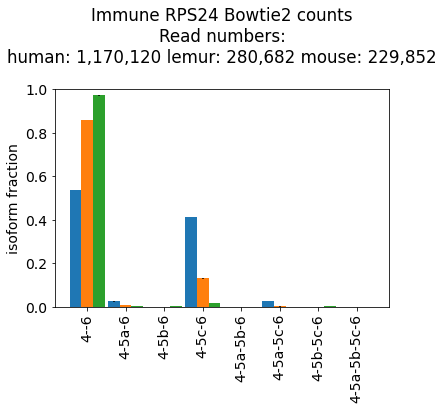

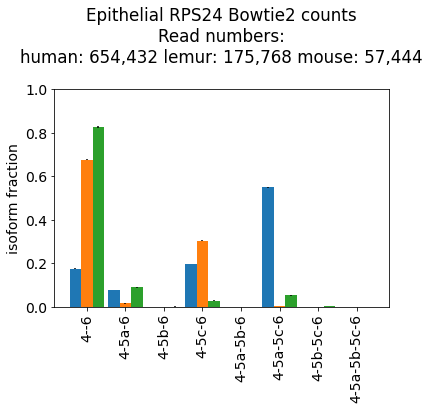

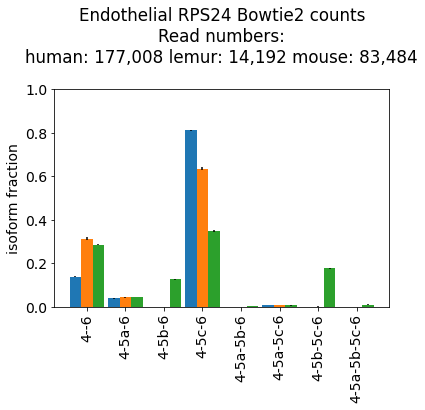

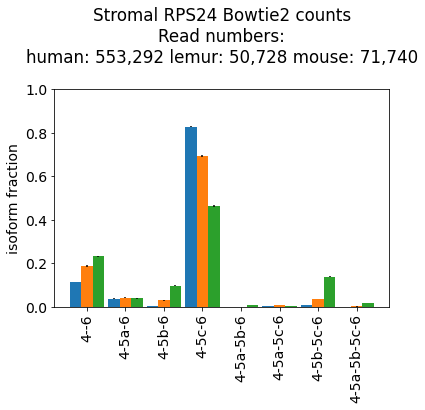

In [23]:


# comp = "Immune"
for comp in ["Immune","Epithelial","Endothelial","Stromal"]:
  index=["4--6","4-5a-6","4-5b-6","4-5c-6","4-5a-5b-6","4-5a-5c-6","4-5b-5c-6","4-5a-5b-5c-6"]
  plot_dict = {}
  for species, sd in species_dict.items():
    plot_dict[species] = []
    ser = sd[sd["compartment"].isin([comp,comp.lower()])].groupby("transcript")["numReads"].sum()
    for i in index:
      if i in ser.index:
        plot_dict[species].append(ser[i])
      else:
        plot_dict[species].append(0)
  #   display(ser)
  plot_df = pd.DataFrame.from_dict(plot_dict)
  plot_df.index=index
  rects = []
  fig, ax = plt.subplots()
  species = ["human","lemur","mouse"]
  width = 0.3
  ind = np.arange(plot_df.shape[0])
  for i in range(len(species)):
    col_sum = plot_df[species[i]].sum()

    lower_err = []
    upper_err = []

    for index, row in plot_df.iterrows():
      lower, upper = proportion_confint(row[species[i]],col_sum,method="beta")
      lower_err.append(lower)
      upper_err.append(upper)
    y_vals = plot_df[species[i]]/col_sum
    rect = ax.bar(ind - 1*width + width*i, y_vals, width, yerr = [[y - x for x, y in zip(lower_err,y_vals)],[x - y for x, y in zip(upper_err,y_vals)]],
                 label = species[i])

    rects.append(rect)
  plt.ylim([0,1])
  ax.set_xticks(ind)
  ax.set_xticklabels(plot_df.index,rotation=90)
  plt.title("{} RPS24 Bowtie2 counts\nRead numbers:\nhuman: {:,} lemur: {:,} mouse: {:,}\n".format(comp,plot_df["human"].sum(),plot_df["lemur"].sum(),plot_df["mouse"].sum()))
  plt.ylabel("isoform fraction")
  plt.savefig("{}{}_RPS24_barplot.png".format(outpath,comp),bbox_inches="tight")
  # plt.legend(bbox_to_anchor=(1.5, 1.05))

  plt.show()